In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [32]:
# Step 1: Data Loading and Exploration
df = pd.read_csv("C:\\Users\\user\\Desktop\\Data Science\\sales_data_sample.csv",encoding= 'unicode_escape')

In [33]:
# Display the first few rows of the dataset
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [34]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [35]:
# Get summary statistics of the dataset
print(df.describe())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25% 

In [36]:
# Step 2: Data Cleaning and Preprocessing
# Handle missing values by dropping rows with missing data
df = df.dropna()

In [37]:
# Identify and remove outliers using z-score
z_scores = np.abs(stats.zscore(df['PRICEEACH']))
df = df[(z_scores < 3)]

In [25]:
# Convert date/time fields to a consistent format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [38]:
# Step 3: Descriptive Statistics
# Calculate basic statistical measures
print('Mean Order Amount:', df['PRICEEACH'].mean())
print('Median Order Amount:', df['PRICEEACH'].median())
print('Standard Deviation of Order Amount:', df['PRICEEACH'].std())

Mean Order Amount: 84.13863945578233
Median Order Amount: 98.05
Standard Deviation of Order Amount: 19.897254840581283


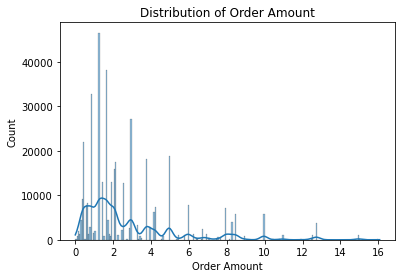

In [27]:
# Visualize the distribution of the Order Amount variable
sns.histplot(df['UnitPrice'], kde=True)
plt.xlabel('Order Amount')
plt.ylabel('Count')
plt.title('Distribution of Order Amount')
plt.show()


In [39]:
# Step 4: Correlation Analysis
# Calculate correlation coefficients
correlation_matrix = df.corr()

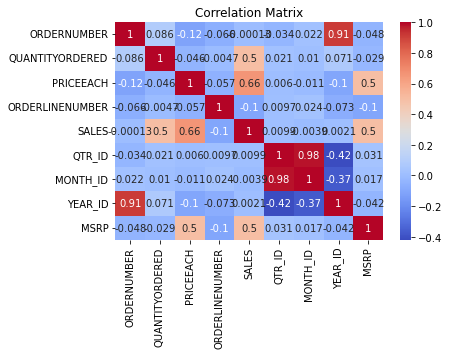

In [40]:
# Visualize correlations using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
# Step 5: Advanced Analytical Methods
# Perform regression analysis
from sklearn.linear_model import LinearRegression

X = df[['SALES', 'QUANTITYORDERED']]
y = df['PRICEEACH']

regression_model = LinearRegression()
regression_model.fit(X, y)

LinearRegression()

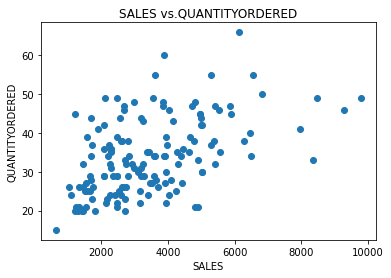

In [45]:
# Step 6: Data Visualization
# Create a scatter plot of Product Price vs. Customer Reviews
plt.scatter(df['SALES'], df['QUANTITYORDERED'])
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.title('SALES vs.QUANTITYORDERED')
plt.show()